In [11]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import cv2
import matplotlib.pyplot as plt
from cv2 import imread, resize # manipulating the images
from tensorflow.keras.optimizers import Adam
import os
import numpy as np          # linear algebra
import pandas as pd         # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, \
     Dense, Input, Activation, Dropout, GlobalAveragePooling2D, AveragePooling2D


ModuleNotFoundError: No module named 'matplotlib.artist'

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'ak': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma',
    'scc': 'Squamous cell carcinoma',
}
lesion_ID_dict = {
    'mel': 0,
    'nv': 1,
    'bcc': 2,
    'ak': 3,
    'bkl': 4,
    'df': 5,
    'vasc': 6,
    'scc' : 7
}

In [22]:
df_skin = pd.read_csv('ISIC_2019_Training_GroundTruth (3).csv')
df_skin.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,Score
0,ISIC_0000000,0,1,0,0,0,0,0,0,0,2
1,ISIC_0000001,0,1,0,0,0,0,0,0,0,2
2,ISIC_0000002,1,0,0,0,0,0,0,0,0,1
3,ISIC_0000003,0,1,0,0,0,0,0,0,0,2
4,ISIC_0000004,1,0,0,0,0,0,0,0,0,1
5,ISIC_0000006,0,1,0,0,0,0,0,0,0,2
6,ISIC_0000007,0,1,0,0,0,0,0,0,0,2
7,ISIC_0000008,0,1,0,0,0,0,0,0,0,2
8,ISIC_0000009,0,1,0,0,0,0,0,0,0,2
9,ISIC_0000010,0,1,0,0,0,0,0,0,0,2


In [ ]:
df_skin['lesion_type']=df_skin['image'].map(lesion_type_dict)
df_skin['lesion_ID'] = df_skin['image'].map(lesion_ID_dict)

# Display the total found images.
print('Total number of images', len(df_skin))


# Display the count of each lesion.
df_skin['lesion_type'].value_counts()

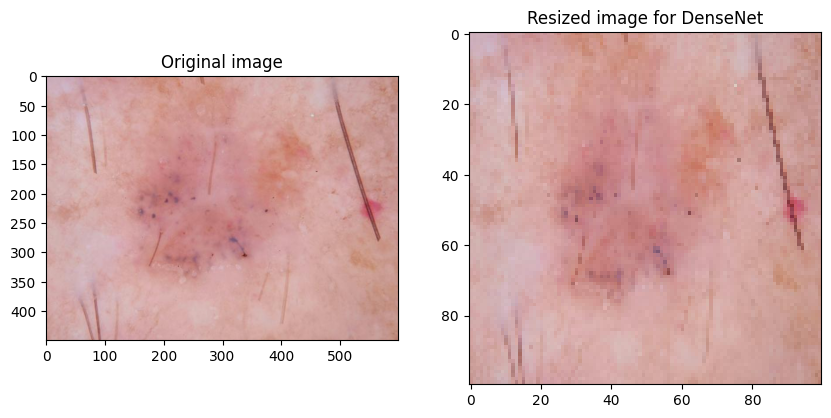

In [18]:
# Reading a random image from our data set
#fname_images = np.array(df_skin['image_id'])
import matplotlib.pyplot as plt
import matplotlib.artist

file_to_read ='Training/BCC/ISIC_0024331.jpg'

# Resizing the read image to 100x100
img = imread(file_to_read)
img2 = resize(img, (100, 100))

# Show one exampe image before and after
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(img2[:, :, ::-1])
plt.title('Resized image for DenseNet')
plt.show()

In [29]:
z = []
x =[]
for row in df_skin['image']:
    z.append(row)

#print(x)

for img in z:
    st = img+".jpg"
    x.append(st)

print(len(x))



25331


In [30]:
print(x)

['ISIC_0000000.jpg', 'ISIC_0000001.jpg', 'ISIC_0000002.jpg', 'ISIC_0000003.jpg', 'ISIC_0000004.jpg', 'ISIC_0000006.jpg', 'ISIC_0000007.jpg', 'ISIC_0000008.jpg', 'ISIC_0000009.jpg', 'ISIC_0000010.jpg', 'ISIC_0000011.jpg', 'ISIC_0000012.jpg', 'ISIC_0000013.jpg', 'ISIC_0000014.jpg', 'ISIC_0000015.jpg', 'ISIC_0000016.jpg', 'ISIC_0000017_downsampled.jpg', 'ISIC_0000018_downsampled.jpg', 'ISIC_0000019_downsampled.jpg', 'ISIC_0000020_downsampled.jpg', 'ISIC_0000021_downsampled.jpg', 'ISIC_0000022_downsampled.jpg', 'ISIC_0000023_downsampled.jpg', 'ISIC_0000024_downsampled.jpg', 'ISIC_0000025_downsampled.jpg', 'ISIC_0000026_downsampled.jpg', 'ISIC_0000027_downsampled.jpg', 'ISIC_0000028_downsampled.jpg', 'ISIC_0000029_downsampled.jpg', 'ISIC_0000030_downsampled.jpg', 'ISIC_0000031_downsampled.jpg', 'ISIC_0000032_downsampled.jpg', 'ISIC_0000034_downsampled.jpg', 'ISIC_0000035_downsampled.jpg', 'ISIC_0000036_downsampled.jpg', 'ISIC_0000037_downsampled.jpg', 'ISIC_0000038_downsampled.jpg', 'ISIC_0

In [32]:
y = []

for row in df_skin['Score']:
    y.append(row)

print(y)

[2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [33]:
print(len(y))

25331


In [41]:
lista2 = os.listdir('C:\ISIC_2019_Training_Input')
x_imgs = []
y_imgs = []
# [+] Handling images from part 1 directory
for i in x:
    # [+] Features: reading and resize the photo.
    fname_image = i
    #fname_ID = fname_image
    file_to_read = 'C:\ISIC_2019_Training_Input\\'+i
    # resolve image name
    img = imread(file_to_read)                                  # read the image
    img2 = resize(img,(100,100))                               # resise our image
    x_imgs.append(img2)                                              # append the new image to the list x.


In [42]:
print(x_imgs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
x = np.array(x_imgs)
y = np.array(y)

# convert y (targets) array as required by softmax activation function
try:
    y_train = to_categorical(y, num_classes = 8)
except Exception :
    pass

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x_imgs,                  # Images array.
                                                    y,            # The training set.
                                                    test_size = 0.20,   # Split data set into 20/80.
                                                    random_state = 50,  # Shuffling number to random the set.
                                                    stratify = y)       # Mix training and test sets.
# [+] Display the count of train/test data set.
x_t = np.array(X_train)
print('Train dataset shape', x_t.shape)
x_t = np.array(X_test)
print('Test dataset shape', x_t.shape)

Train dataset shape (20264, 100, 100, 3)
Test dataset shape (5067, 100, 100, 3)


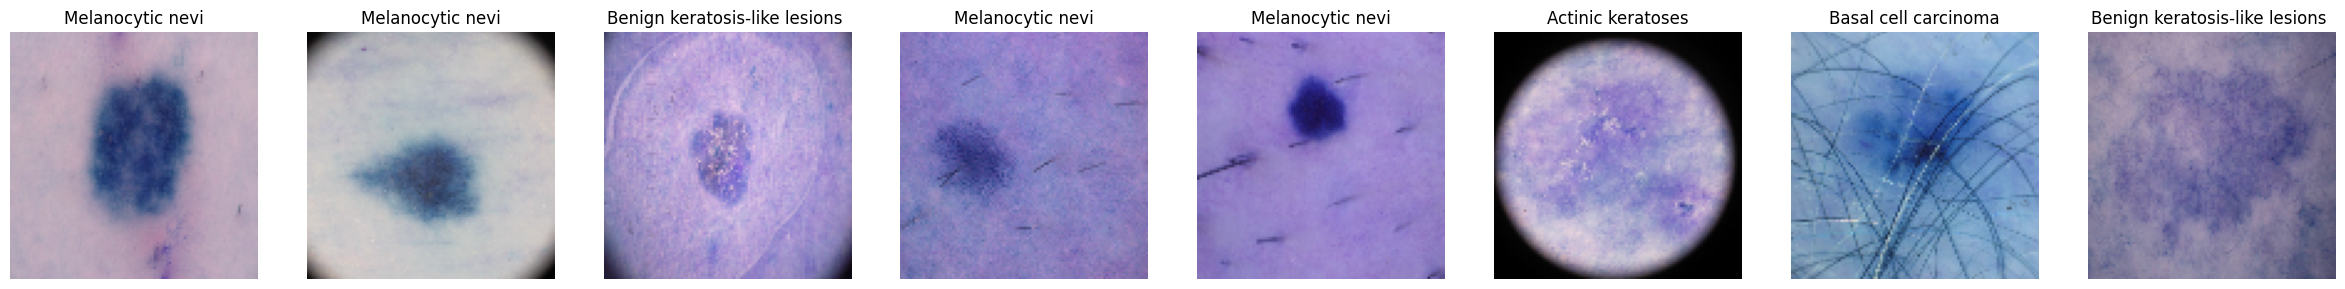

In [65]:
def show_neg_figuers() -> None:
    """ Display negative figuers of the classes. """
    # Figure, Axes
    lesion_names = ['unk','Melanoma','Melanocytic nevi','Basal cell carcinoma','Actinic keratoses','Benign keratosis-like lesions ','Dermatofibroma'
               'Vascular lesions','Squamous cell carcinoma'
               ]
    _, ax = plt.subplots(1, 8, figsize = (30, 30))
    for i in range(8):
        ax[i].set_axis_off()                                    # set the image to negative.
        ax[i].imshow(X_train[i+5666])                                # Display the img.
       # ax[i].set_title(lesion_names[np.argmax(y_train[i])])

        ax[i].set_title(lesion_names[y_train[i+5666]])
    # Set image title.

show_neg_figuers()

In [55]:
print(y_train)

[1 2 5 ... 2 2 2]


In [60]:
for i in range(8):
    print(z[i])

ISIC_0000000
ISIC_0000001
ISIC_0000002
ISIC_0000003
ISIC_0000004
ISIC_0000006
ISIC_0000007
ISIC_0000008


In [66]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [67]:
model = Sequential()

# [+] 1st convolutional layer
model.add(Conv2D(filters = 96,
                kernel_size = (11, 11),
                strides = (4, 4),
                activation = 'relu',
                input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
model.add(Conv2D(filters = 256,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
model.add(Conv2D(filters = 384,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding="same"))
model.add(BatchNormalization())

# [+] 4th convolutional layer
model.add(Conv2D(filters = 384,
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Flatten())  # [+] Convert the Conv2D objects into one List.

# [+] 6th, Dense layer:
# From the Docs:
# A Dense layer feeds all outputs from the previous layer to all its neurons,
# each neuron providing one output to the next layer.
# source: www.stackoverflow.com
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

# [+] 7th Dense layer
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

# [+] 8th output layer
model.add(Dense(8, activation = 'softmax'))

In [69]:
def est_class_weights(dis_id: np.array) -> dict:
    """Estimate class weights for unbalanced datasets.

    Args:
        dis_id (np.array): numpy array of dis IDs

    Returns:
        dict: Estimated class weights for for unbalanced datasets.
    """
    class_weights = np.around(compute_class_weight(class_weight = 'balanced', classes = np.unique(dis_id), y = y), 2)
    class_weights = dict(zip(np.unique(dis_id), class_weights))

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [79]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape


(20264, 100, 100, 3)

In [73]:
from keras.preprocessing.image import ImageDataGenerator
def mod_checkpoint_callback() -> None:
    """
    Saving our model

    Returns:
        None: Saving a checkpoint of the model.
    """
    trained_model = ModelCheckpoint(filepath = 'model_multiclass.h5',  # result file name
                             save_weights_only = False,     # Save all training results/params.
                             monitor = 'val_accuracy',
                                 mode = 'auto',                 # enable auto save.
                             save_best_only = True,         # if ac_new > ac_old
                             verbose = 1)
    return trained_model

#early_stopping_monitor = EarlyStopping(patience = 100, monitor = 'val_accuracy')

model_checkpoint_callback = mod_checkpoint_callback()

optimizer = Adam(learning_rate= 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True, shear_range = 0.2)
datagen.fit(X_train)

batch_size = 32     # samples in the network at once.
epochs = 10        # epochs number.


history = model.fit(datagen.flow(X_train,y_train),
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    callbacks = [model_checkpoint_callback],
                    validation_data = (X_test, y_test)

                )
# check our model accuracy if it's step forward.


ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (100, 100, 3), y.shape = (20264,)